In [1]:
import os,sys
import numpy as np
from tmd import TMD
import pylab as py

## Load the TMD class

In [2]:
tag='JAM3D_2020' 
tmd=TMD(tag)

JAM3D_2020 is a tag for a given analysis. See the table in the readme file.

## Simple test

In [3]:
x=0.1
Q2=10.0
kT=0.1
print(tmd.eval(x,Q2,kT,'p','transversity',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','transversity',0,icol=True))

[  2.42041094e-01   4.83218234e-01   0.00000000e+00  -2.05787420e-04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.42041094e-01
   2.42041094e-01   2.42041094e-01   2.42041094e-01]
[  6.42582127e-01   1.40267663e+00   0.00000000e+00  -5.97355781e-04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   6.42582127e-01
   6.42582127e-01   6.42582127e-01   6.42582127e-01]


- icol=False will give the full TMD while icol=True will return only the collinear part: see Eqs. (1)-(5) of...


- The 5th argument in tmd.eval is the hadron (p: proton, pi: pion)


- The 6th argument in tmd.eval is the replica index (0 is chosen in this case). You can get the number of replicas via tmd.nrep:


In [4]:
tmd.nrep

953

## Transversity (collinear)

Generate the data

In [5]:
X=np.linspace(0.01,0.99,100)
Q2=4.0
kT=0.0
nrep=50  #--let's use a subset of the replicas
tran=np.array([[tmd.eval(x,Q2,kT,'p','transversity',irep,icol=True) for x in X] for irep in range(nrep)])
print(tran.shape)

(50, 100, 11)


- This is 50 replicas, 100 x-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [6]:
u_rep=tran[:,:,1]
d_rep=tran[:,:,3]

u  = np.mean(u_rep,axis=0)
du = np.std(u_rep,axis=0)
d  = np.mean(d_rep,axis=0)
dd = np.std(d_rep,axis=0)


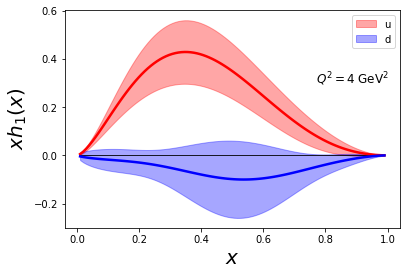

In [7]:
ax=py.subplot(111)
ax.fill_between(X,X*(u-du),X*(u+du),color="r",alpha=0.35,label='u')
ax.fill_between(X,X*(d-dd),X*(d+dd),color="b",alpha=0.35,label='d')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(X,X*u,color="r",linewidth=2.5)
ax.plot(X,X*d,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$xh_1(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.text(0.77,0.3,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)


py.show()

## Transversity (TMD)

Generate the data

In [8]:
KT=np.linspace(0.01,0.99,100)
Q2=4.0
x=0.1
nrep=50  #--let's use a subset of the replicas
trankT=np.array([[tmd.eval(x,Q2,kT,'p','transversity',irep,icol=False) for kT in KT] for irep in range(nrep)])
print(trankT.shape)

(50, 100, 11)


- This is 50 replicas, 100 kT-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [9]:
u_repkT=trankT[:,:,1]
d_repkT=trankT[:,:,3]

ukT  = np.mean(u_repkT,axis=0)
dukT = np.std(u_repkT,axis=0)
dkT  = np.mean(d_repkT,axis=0)
ddkT = np.std(d_repkT,axis=0)


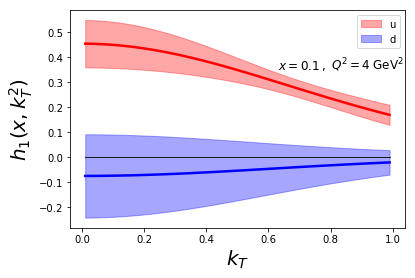

In [10]:
ax=py.subplot(111)
ax.fill_between(KT,(ukT-dukT),(ukT+dukT),color="r",alpha=0.35,label='u')
ax.fill_between(KT,(dkT-ddkT),(dkT+ddkT),color="b",alpha=0.35,label='d')


ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(KT,ukT,color="r",linewidth=2.5)
ax.plot(KT,dkT,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$h_1(x,k_T^2)$',size=20)
ax.set_xlabel(r'$k_T$',size=20)
ax.text(0.63,0.35,r'$x=0.1\,,$',fontsize=12)
ax.text(0.8,0.35,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)


py.show()

## Sivers first moment (collinear)

Generate the data

In [11]:
X=np.linspace(0.01,0.99,100)
Q2=4.0
kT=0.0
nrep=50  #--let's use a subset of the replicas
siv=np.array([[tmd.eval(x,Q2,kT,'p','sivers',irep,icol=True) for x in X] for irep in range(nrep)])
print(siv.shape)

(50, 100, 11)


- This is 50 replicas, 100 x-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [12]:
u_rep=siv[:,:,1]
d_rep=siv[:,:,3]

u  = np.mean(u_rep,axis=0)
du = np.std(u_rep,axis=0)
d  = np.mean(d_rep,axis=0)
dd = np.std(d_rep,axis=0)


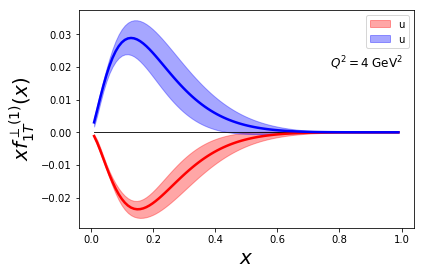

In [13]:
ax=py.subplot(111)
ax.fill_between(X,X*(u-du),X*(u+du),color="r",alpha=0.35,label='u')
ax.fill_between(X,X*(d-dd),X*(d+dd),color="b",alpha=0.35,label='u')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(X,X*u,color="r",linewidth=2.5)
ax.plot(X,X*d,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$xf_{1T}^{\perp(1)}(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.text(0.77,0.02,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)


py.show()

## Sivers (TMD)

Generate the data

In [14]:
KT=np.linspace(0.01,0.99,100)
Q2=4.0
x=0.1
nrep=50  #--let's use a subset of the replicas
sivkT=np.array([[tmd.eval(x,Q2,kT,'p','sivers',irep,icol=False) for kT in KT] for irep in range(nrep)])
print(sivkT.shape)

(50, 100, 11)


- This is 50 replicas, 100 kT-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [15]:
u_repkT=sivkT[:,:,1]
d_repkT=sivkT[:,:,3]

ukT  = np.mean(u_repkT,axis=0)
dukT = np.std(u_repkT,axis=0)
dkT  = np.mean(d_repkT,axis=0)
ddkT = np.std(d_repkT,axis=0)


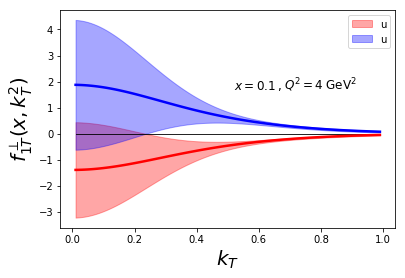

In [16]:
ax=py.subplot(111)
ax.fill_between(KT,(ukT-dukT),(ukT+dukT),color="r",alpha=0.35,label='u')
ax.fill_between(KT,(dkT-ddkT),(dkT+ddkT),color="b",alpha=0.35,label='u')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(KT,ukT,color="r",linewidth=2.5)
ax.plot(KT,dkT,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$f_{1T}^\perp(x,k_T^2)$',size=20)
ax.set_xlabel(r'$k_T$',size=20)
ax.text(0.52,1.7,r'$x=0.1\,,$',fontsize=12)
ax.text(0.68,1.7,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)


py.show()

## Collins first moment (collinear)

Generate the data

In [17]:
X=np.linspace(0.01,0.99,100)
Q2=4.0
kT=0.0
nrep=50  #--let's use a subset of the replicas
col=np.array([[tmd.eval(x,Q2,kT,'pi','collinspi',irep,icol=True) for x in X] for irep in range(nrep)])
print(col.shape)

(50, 100, 11)


- This is 50 replicas, 100 z-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot favored and unfavored

In [18]:
fav_rep=col[:,:,1]
unf_rep=col[:,:,3]

fav  = np.mean(fav_rep,axis=0)
dfav = np.std(fav_rep,axis=0)
unf  = np.mean(unf_rep,axis=0)
dunf = np.std(unf_rep,axis=0)


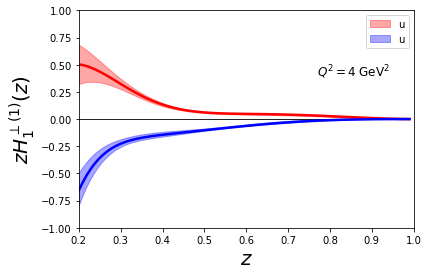

In [19]:
ax=py.subplot(111)
ax.fill_between(X,X*(fav-dfav),X*(fav+dfav),color="r",alpha=0.35,label='u')
ax.fill_between(X,X*(unf-dunf),X*(unf+dunf),color="b",alpha=0.35,label='u')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(X,X*fav,color="r",linewidth=2.5)
ax.plot(X,X*unf,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$zH_{1}^{\perp(1)}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.text(0.77,0.4,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)

ax.set_xlim(0.2,1)
ax.set_ylim(-1,1)

py.show()

## Collins (TMD)

Generate the data

In [20]:
KT=np.linspace(0.01,0.99,100)
Q2=4.0
z=0.3
nrep=50  #--let's use a subset of the replicas
colkT=np.array([[tmd.eval(z,Q2,kT,'pi','collinspi',irep,icol=False) for kT in KT] for irep in range(nrep)])
print(colkT.shape)

(50, 100, 11)


- This is 50 replicas, 100 kT-values and 11 partons


- 11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

Plot u and d

In [21]:
fav_repkT=colkT[:,:,1]
unf_repkT=colkT[:,:,3]

favkT  = np.mean(fav_repkT,axis=0)
dfavkT = np.std(fav_repkT,axis=0)
unfkT  = np.mean(unf_repkT,axis=0)
dunfkT = np.std(unf_repkT,axis=0)


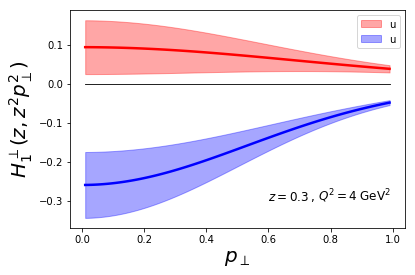

In [22]:
ax=py.subplot(111)
ax.fill_between(KT,(favkT-dfavkT),(favkT+dfavkT),color="r",alpha=0.35,label='u')
ax.fill_between(KT,(unfkT-dunfkT),(unfkT+dunfkT),color="b",alpha=0.35,label='u')

ax.plot(X,X*0,color="k",linewidth=0.85)

ax.plot(KT,favkT,color="r",linewidth=2.5)
ax.plot(KT,unfkT,color="b",linewidth=2.5)

ax.legend()

ax.set_ylabel(r'$H_{1}^\perp(z,z^2 p_\perp^2)$',size=20)
ax.set_xlabel(r'$p_\perp$',size=20)
ax.text(0.6,-0.3,r'$z=0.3\,,$',fontsize=12)
ax.text(0.76,-0.3,r'$Q^2=4\; {\rm GeV}^2$',fontsize=12)


py.show()